In [4]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
from scipy import stats
rng = np.random.default_rng()

In [6]:

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [7]:
# Lets count raw bike counters
bdata=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/Eco_combined_data_rural_vs_urban_before_QA_QC.csv')
bdata.groupby(['year'])['ID'].nunique()

year
2018    406
2019    406
2020    416
2021    416
Name: ID, dtype: int64

In [8]:
bdata['ID'].nunique()

416

# compare Bike Estimations

In [64]:
# read lindsey bike MADT
L_bike_madt=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/lindsey_bike_AASHTO_MADT_for_CA.csv')
L_bike_madt = L_bike_madt.rename(columns={'AASHTO_MADT': 'AASHTO_MADBT_Using_Lindsey_QC'})
L_bike_madt.head()

,Unnamed: 0,ID,year,month,AASHTO_MADBT_Using_Lindsey_QC
0,0,671,2018,1,65.478571
1,1,671,2018,2,60.928571
2,2,671,2018,3,48.907143
3,3,671,2018,4,52.942857
4,4,671,2018,5,64.071429


In [53]:
L_bike_madt.groupby(['year'])['ID'].nunique()

year
2018    176
2019    167
2020    145
2021    165
Name: ID, dtype: int64

In [78]:
L_bike_madt['ID'].nunique()

259

In [65]:
# read our bike MADT
bike_madt=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/our_bike_AASHTO_MADT for CA.csv')
bike_madt = bike_madt.rename(columns={'AASHTO_MADT': 'AASHTO_MADBT_Using_Our_QC'})
bike_madt.head()

,Unnamed: 0,ID,year,month,AASHTO_MADBT_Using_Our_QC
0,0,671,2018,1,65.478571
1,1,671,2018,2,60.928571
2,2,671,2018,3,48.907143
3,3,671,2018,4,52.942857
4,4,671,2018,5,64.071429


In [66]:
bike_madt.groupby(['year'])['ID'].nunique()

year
2018    175
2019    165
2020    142
2021    156
Name: ID, dtype: int64

In [79]:
bike_madt['ID'].nunique()

250

In [67]:
bike_data=pd.merge(L_bike_madt,bike_madt,on=['ID','year','month'], how='inner')
bike_data.head()

,Unnamed: 0_x,ID,year,month,AASHTO_MADBT_Using_Lindsey_QC,Unnamed: 0_y,AASHTO_MADBT_Using_Our_QC
0,0,671,2018,1,65.478571,0,65.478571
1,1,671,2018,2,60.928571,1,60.928571
2,2,671,2018,3,48.907143,2,48.907143
3,3,671,2018,4,52.942857,3,52.942857
4,4,671,2018,5,64.071429,4,64.071429


In [85]:
bike_data['ID'].nunique()

250

In [57]:
L_bike_madt.shape, bike_madt.shape, bike_data.shape

((5772, 5), (5327, 5), (5326, 7))

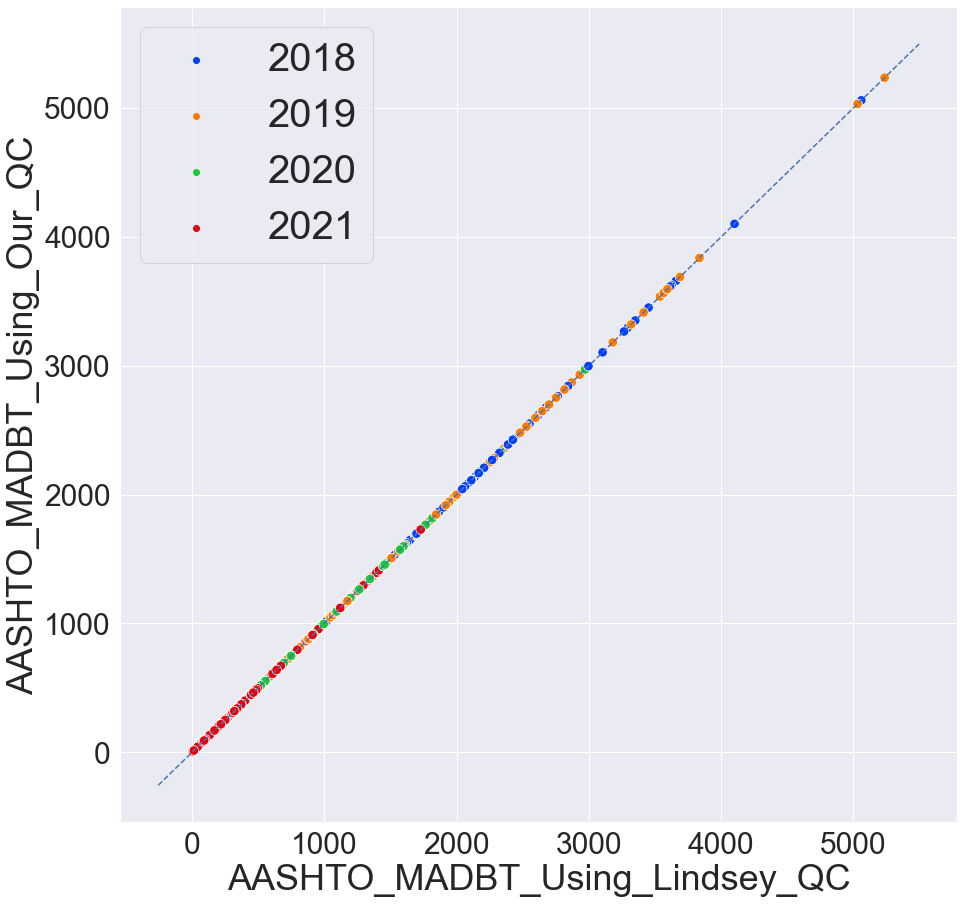

In [68]:
#sns.set(font_scale=3) 
sns.set(font_scale=3)
plt.figure(figsize=(15,15))
g=sns.scatterplot(data=bike_data, x="AASHTO_MADBT_Using_Lindsey_QC", y="AASHTO_MADBT_Using_Our_QC", hue="year", palette="bright",s=90)
g.legend(fontsize=40)
abline(1, (0,0))
# plt.xlim(0,0.80)
# plt.ylim(0,0.80)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [33]:
stats.ttest_rel(bike_data.AASHTO_MADT_Using_Lindsey_QA, bike_data.AASHTO_MADT_Using_Our_QA)

Ttest_relResult(statistic=-1.2426001471306547, pvalue=0.2176005043875539)

# Compare ped MADT

In [9]:
# Lets count raw bike counters
pdata=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/Eco_combined_data_rural_vs_urban_before_QA_QC.csv')
pdata.groupby(['year'])['ID'].nunique()

year
2018    274
2019    274
2020    274
2021    274
2022    282
Name: ID, dtype: int64

In [10]:
pdata['ID'].nunique()

282

In [72]:
# read lindsey ped MADT
L_ped_madt=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/lindsey_ped_AASHTO_MADT for CA.csv')
L_ped_madt = L_ped_madt.rename(columns={'AASHTO_MADT': 'AASHTO_MADPT_Using_Lindsey_QC'})
L_ped_madt.head()

,Unnamed: 0,ID,year,month,AASHTO_MADPT_Using_Lindsey_QC
0,0,572,2018,1,188.971429
1,1,572,2018,2,213.142857
2,2,572,2018,3,235.550000
3,3,572,2018,4,221.250000
4,4,572,2018,5,220.435714


In [82]:
L_ped_madt.groupby(['year'])['ID'].nunique()

year
2018     94
2019     93
2020     96
2021    129
2022    147
Name: ID, dtype: int64

In [83]:
L_ped_madt['ID'].nunique()

213

In [73]:
# read our ped MADT
ped_madt=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/our_ped_AASHTO_MADT for CA.csv')
ped_madt = ped_madt.rename(columns={'AASHTO_MADT': 'AASHTO_MADPT_Using_Our_QC'})
ped_madt.head()

,Unnamed: 0,ID,year,month,AASHTO_MADPT_Using_Our_QC
0,0,572,2018,1,188.971429
1,1,572,2018,2,213.142857
2,2,572,2018,3,235.550000
3,3,572,2018,4,221.250000
4,4,572,2018,5,220.435714


In [80]:
ped_madt.groupby(['year'])['ID'].nunique()

year
2018     90
2019     88
2020     92
2021    123
2022    145
Name: ID, dtype: int64

In [81]:
bike_madt['ID'].nunique()

250

In [76]:
ped_data=pd.merge(L_ped_madt,ped_madt,on=['ID','year','month'], how='inner')
ped_data.head()

,Unnamed: 0_x,ID,year,month,AASHTO_MADPT_Using_Lindsey_QC,Unnamed: 0_y,AASHTO_MADPT_Using_Our_QC
0,0,572,2018,1,188.971429,0,188.971429
1,1,572,2018,2,213.142857,1,213.142857
2,2,572,2018,3,235.550000,2,235.550000
3,3,572,2018,4,221.250000,3,221.250000
4,4,572,2018,5,220.435714,4,220.435714


In [84]:
ped_data['ID'].nunique()

208

In [75]:
L_ped_madt.shape, ped_madt.shape, ped_data.shape

((4554, 5), (3922, 5), (3920, 7))

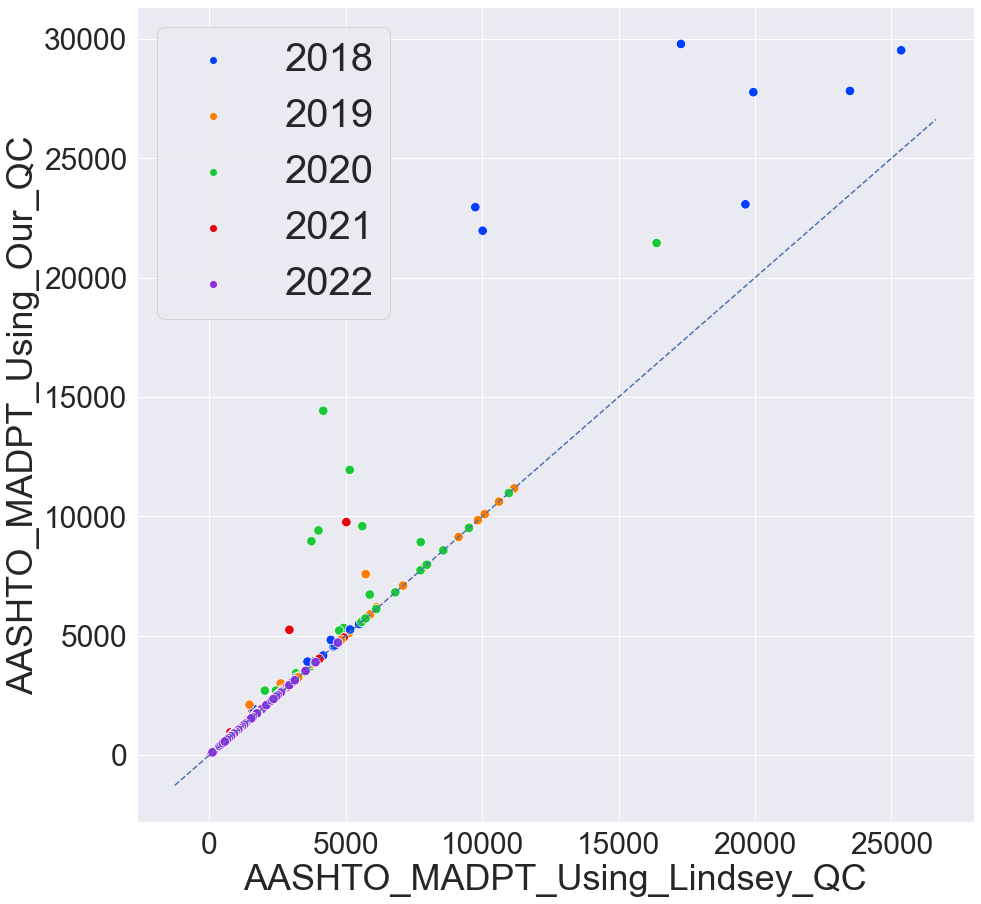

In [77]:
#sns.set(font_scale=3) 
sns.set(font_scale=3)
plt.figure(figsize=(15,15))
g=sns.scatterplot(data=ped_data, x="AASHTO_MADPT_Using_Lindsey_QC", y="AASHTO_MADPT_Using_Our_QC", hue="year", palette="bright",s=90)
g.legend(fontsize=40)
abline(1, (0,0))
# plt.xlim(0,0.80)
# plt.ylim(0,0.80)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [ ]:
# do the pair t-test to find significance of difference

In [32]:
stats.ttest_rel(ped_data.AASHTO_MADT_Using_Lindsey_QA, ped_data.AASHTO_MADT_Using_Our_QA)

Ttest_relResult(statistic=-1.4028171085475518, pvalue=0.16535814037066818)